<a href="https://colab.research.google.com/github/sairasq/JavaScript-memory-game/blob/main/Copy_of_CIS256_ps6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this problem set, using Python and Pylab, you will design and implement a stochastic simulation of patient and virus population dynamics, and reach conclusions about treatment regimens based on the simulation results.

### Background: Viruses, Drug Treatments, and Computational Models
Viruses such as HIV and H1N1 represent a significant challenge to modern medicine. One of the reasons that they are so difficult to treat is their ability to evolve.

As you may know from introductory biology classes, the traits of an organism are determined by its genetic code. When organisms reproduce, their offspring will inherit genetic information from their parent. This genetic information will be modified, either because of mixing of the two parents' genetic information, or through mutations in the genome replication process, thus introducing diversity into a population.

Viruses are no exception. Two characteristics of viruses make them particularly difficult to treat. The first is that their replication mechanism often lacks the error checking mechanisms that are present in more complex organisms. This speeds up the rate of mutation. Secondly, viruses replicate extremely quickly (orders of magnitude faster than humans) -- thus, while we may be used to thinking of evolution as a process which occurs over long time scales, populations of viruses can undergo substantial evolutionary changes within a single patient over the course of treatment.

These two characteristics allow a virus population to acquire genetic resistance to therapy quickly. In this problem set, we will make use of simulations to explore the effect of introducing drugs on the virus population and determine how best to address these treatment challenges within a simplified model.

Computational modeling has played an important role in the study of viruses such as HIV (for example, see this paper, by MIT graduate David Ho). In this problem, we will implement a highly simplified stochastic model of virus population dynamics. Many details have been swept under the rug (host cells are not explicitly modeled and the size of the population is several orders of magnitude less than the size of actual virus populations). Nevertheless, our model exhibits biologically relevant characteristics and will give you a chance to analyze and interpret interesting simulation data.

Spread of a Virus in a Person
In reality, diseases are caused by viruses and have to be treated with medicine, so in the remainder of this problem set, we'll be looking at a detailed simulation of the spread of a virus within a person. We've provided you with skeleton code in ps5b.py.
  
# Problem 1: Implementing a Simple Simulation (No Drug Treatment)

We start with a trivial model of the virus population - the patient does not take any drugs and the viruses do not acquire resistance to drugs. We simply model the virus population inside a patient as if it were left untreated.

### SimpleVirus class
To implement this model, you will need to fill in the SimpleVirus class, which maintains the state of a single virus particle. You will implement the methods `__init__`, `getMaxBirthProb`, `getClearProb`,`doesClear`, and `reproduce` according to the specifications. Use `random.random()` for generating random numbers to ensure that your results are consistent with ours.

`Hint: random seed`

The reproduce method in SimpleVirus should produce an offspring by returning a new instance of SimpleVirus with probability: `self.maxBirthProb * (1 - popDensity)`. This method raises a `NoChildException` if the virus particle does not reproduce. For a reminder on raising execptions, review the Python docs.

`self.maxBirthProb` is the birth rate under optimal conditions (the virus population is negligible relative to the available host cells so there is ample nourishment available). popDensity is defined as the ratio of the current virus population to the maximum virus population for a patient and should be calculated in the update method of the Patient class.

### Patient class
You will also need to implement the `Patient` class, which maintains the state of a virus population associated with a patient.

The update method in the Patient class is the inner loop of the simulation. It modifies the state of the virus population for a single time step and returns the total virus population at the end of the time step. At every time step of the simulation, each virus particle has a fixed probability of being cleared (eliminated from the patient's body). If the virus particle is not cleared, it is considered for reproduction. If you utilize the population density correctly, you shouldn't need to provide an explicit check that the virus population exceeds maxPop when you are calculating how many offspring are added to the population -- you just calculate the new population density and use that for the next call to update.

Unlike the clearance probability, which is constant, the probability of a virus particle reproducing is a function of the virus population. With a larger virus population, there are fewer resources in the patient's body to facilitate reproduction, and the probability of reproduction will be lower. One way to think of this limitation is to consider that virus particles need to make use of a patient's cells to reproduce; they cannot reproduce on their own. As the virus population increases, there will be fewer available host cells for viruses to utilize for reproduction.

To summarize, update should first decide which virus particles are cleared and which survive by making use of the `doesClear` method of each `SimpleVirus` instance, then update the collection of SimpleVirus instances accordingly. With the surviving `SimpleVirus` instances, update should then call the `reproduce` method for each virus particle. Based on the population density of the surviving SimpleVirus instances, reproduce should either return a new instance of SimpleVirus representing the offspring of the virus particle, or raise a `NoChildException` indicating that the virus particle does not reproduce during the current time step. The update method should update the attributes of the patient appropriately under either of these conditions. After iterating through all the virus particles, the update method returns the number of virus particles in the patient at the end of the time step.

`Hint: mutating objects`

Note that the mapping between time steps and actual time will vary depending on the type of virus being considered, but for this problem set, think of a time step as a simulated hour of time.

About the grader: When defining a `Patient` class member variable to store the viruses list representing the virus population, please use the name `self.viruses` in order for your code to be compatible with the grader and to pass one of the tests.

Note: If you want to use numpy arrays, you should add the following lines at the beginning of your code for the grader:
```python
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
```
Then, do ```import numpy as np and use np.METHOD_NAME``` in your code.

# Problem 2-1: Running and Analyzing a Simple Simulation (No Drug Treatment)

You should start by understanding the population dynamics before introducing any drug.

Fill in the function `simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials)` that instantiates a Patient, simulates changes to the virus population for 300 time steps (i.e., 300 calls to update), and plots the average size of the virus population as a function of time; that is, the x-axis should correspond to the number of elapsed time steps, and the y-axis should correspond to the average size of the virus population in the patient. The population at time=0 is the population after the first call to update.

Run the simulation for `numTrials` trials, where `numTrials` in this case can be up to 100 trials. Use `pylab` or `plotly` to produce a plot (with a single curve) that displays the average result of running the simulation for many trials. Make sure you run enough trials so that the resulting plot does not change much in terms of shape and time steps taken for the average size of the virus population to become stable. Don't forget to include axes labels, a legend for the curve, and a title on your plot.

You should call `simulationWithoutDrug` with the following parameters:

```python
numViruses = 100

maxPop (maximum sustainable virus population) = 1000

maxBirthProb (maximum reproduction probability for a virus particle) = 0.1

clearProb (maximum clearance probability for a virus particle) = 0.05
```

Thus, your simulation should be instantiatating one Patient with a list of 100 SimpleVirus instances. Each SimpleVirus instance in the viruses list should be initialized with the proper values for maxBirthProb and clearProb.

`Hint: graphing`

Consult reference documentation on pylab or plotly as reference. Scroll down on the page to find a list of all the plotting commands in pylab or plotly.

`Hint: testing your simulation`

For further testing, we have provided the .pyc (compiled Python) files for the completed Patient and SimpleVirus classes (and for Problem 5, the ResistantVirus and TreatedPatient classes) that you can use to confirm that your code is generating the correct results during simulation.

If you comment out your versions of these classes in ps5b.py, and add the following import statements to the top of your file, you can run the simulation using our pre-compiled implementation of these classes to make sure you are obtaining the correct results. This is a good way to test if you've implemented these classes correctly. Make sure to comment out the ```import statement``` and uncomment your implementations before moving to Problem 4.

Notes:

Note: If you want to use numpy arrays, you should add the following lines at the beginning of your code for the grader:
```python
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
```
Then, do ```import numpy as np and use np.METHOD_NAME``` in your code.

Use this code in the grader, to plot:
```python
pylab.plot(YOUR_Y_AXIS_VALUES, label = "SimpleVirus")
pylab.title("SimpleVirus simulation")
pylab.xlabel("Time Steps")
pylab.ylabel("Average Virus Population")
pylab.legend(loc = "best")
pylab.show()
```
        
For Python 3.5: from ps5b_precompiled_35 import *

For Python 3.6: from ps5b_precompiled_36 import *

For Python 3.7: from ps5b_precompiled_37 import *

# Problem 3: Implementing a Simulation With Drugs

In this problem, we consider the effects of both administering drugs to the patient and the ability of virus particle offsprings to inherit or mutate genetic traits that confer drug resistance. As the virus population reproduces, mutations will occur in the virus offspring, adding genetic diversity to the virus population. Some virus particles gain favorable mutations that confer resistance to drugs.

### ResistantVirus class
In order to model this effect, we introduce a subclass of SimpleVirus called ResistantVirus. ResistantVirus maintains the state of a virus particle's drug resistances, and accounts for the inheritance of drug resistance traits to offspring. Implement the ResistantVirus class.

`Hint: reproduce function child resistances`
Note: If you want to use numpy arrays, you should add the following lines at the beginning of your code for the grader:
```python
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
```
Then, do ```import numpy as np and use np.METHOD_NAME``` in your code.

# Problem 4: TreatedPatient Class

We also need a representation for a patient that accounts for the use of drug treatments and manages a collection of ResistantVirus instances. For this, we introduce the TreatedPatient class, which is a subclass of Patient. TreatedPatient must make use of the new methods in ResistantVirus and maintain the list of drugs that are administered to the patient.

Drugs are given to the patient using the TreatedPatient class's addPrescription() method. What happens when a drug is introduced? The drugs we consider do not directly kill virus particles lacking resistance to the drug, but prevent those virus particles from reproducing (much like actual drugs used to treat HIV). Virus particles with resistance to the drug continue to reproduce normally. Implement the TreatedPatient class.

`Hint: reproduce function child resistances`
Note: If you want to use numpy arrays, you should add the following lines at the beginning of your code for the grader:
```python
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
```
Then, do ```import numpy as np and use np.METHOD_NAME``` in your code.

# Problem 5: Running and Analyzing a Simulation With a Drug

In this problem, we will use the implementation you filled in for Problem 4 to run a simulation. You will create a TreatedPatient instance with the following parameters, then run the simulation:

`viruses`, a list of 100 ResistantVirus instances

`maxPop`, `maximum sustainable virus population` = 1000

Each ResistantVirus instance in the viruses list should be initialized with the following parameters:
```python
maxBirthProb, maximum reproduction probability for a virus particle = 0.1

clearProb, maximum clearance probability for a virus particle = 0.05

resistances, The virus's genetic resistance to drugs in the experiment = {'guttagonol': False}

mutProb, probability of a mutation in a virus particle's offspring = 0.005
```

Run a simulation that consists of 150 time steps, followed by the addition of the drug, guttagonol, followed by another 150 time steps. You should make use of the function simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances, mutProb, numTrials). As with problem 3, perform up to 100 trials and make sure that your results are repeatable and representative.

Create one plot that records both the average total virus population and the average population of guttagonol-resistant virus particles over time.

A few good questions to consider as you look at your plots are: What trends do you observe? Are the trends consistent with your intuition? Feel free to discuss the answers to these questions in the forum, to fully comment your understanding of this problem set, processing and interpreting data.

Again, as in Problem 2, you can use the provided .pyc file to check that your implementation of the TreatedPatient and ResistantVirus classes work as expected.

[ps5b_precompiled_39.pyc](https://drive.google.com/file/d/1uaW3ujli4oS4ch3uAejnyTRKhvayT2jw/view?usp=sharing)



Running simulation without drug...


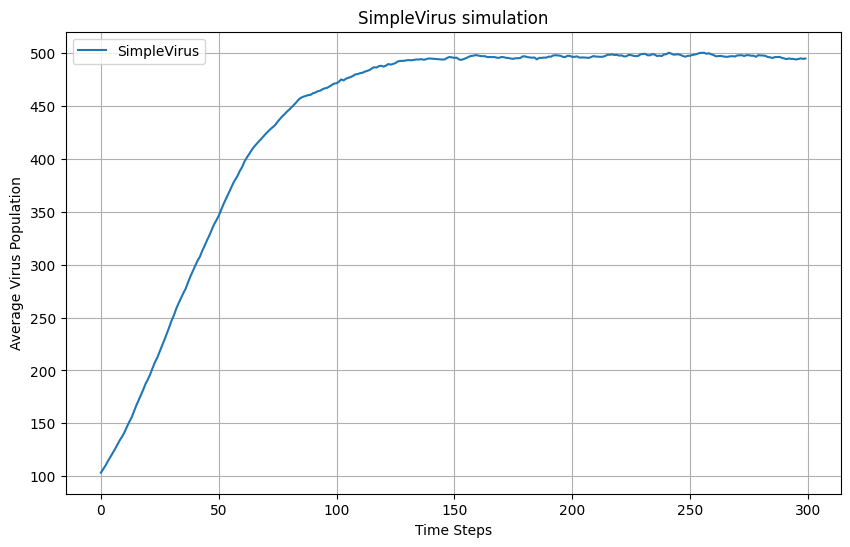


Running simulation with drug...


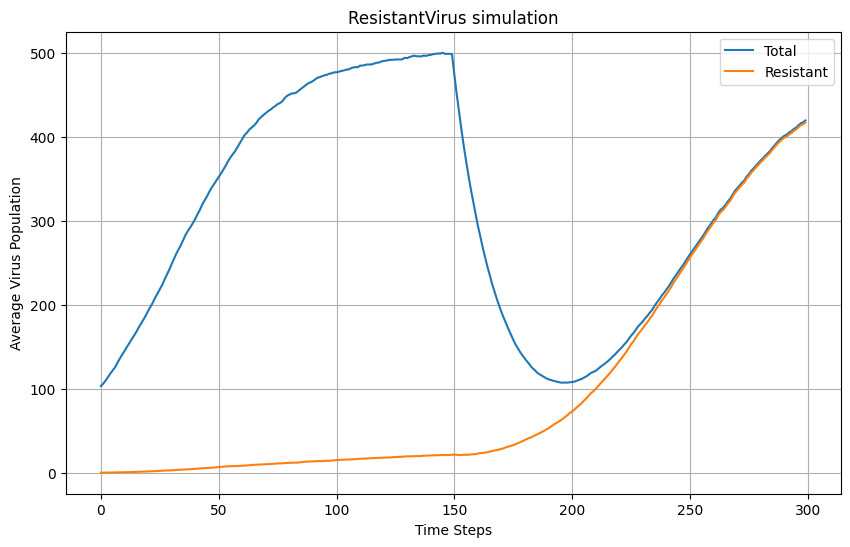

In [1]:
# Problem Set 6: Simulating the Spread of Disease and Virus Population Dynamics
import random
import matplotlib.pyplot as plt
import numpy as np

'''
Begin helper code
'''
class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is.
    """
    pass
'''
End helper code
'''

#
# PROBLEM 1: Implementing a Simple Simulation (No Drug Treatment)
#
class SimpleVirus(object):
    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance:
        maxBirthProb: Maximum reproduction probability (a float between 0-1)
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """Returns the max birth probability."""
        return self.maxBirthProb

    def getClearProb(self):
        """Returns the clear probability."""
        return self.clearProb

    def doesClear(self):
        """
        Stochastically determines whether this virus is cleared from the
        patient's body at a time step.
        returns: True with probability self.getClearProb, False otherwise.
        """
        return random.random() <= self.clearProb

    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient class.

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.

        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.
        """
        reproduce_prob = self.maxBirthProb * (1 - popDensity)
        if random.random() <= reproduce_prob:
            return SimpleVirus(self.maxBirthProb, self.clearProb)
        raise NoChildException()

class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """
    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes. Also initializes the list of viruses (a list of
        SimpleVirus instances) and the maxPop (maximum virus population for this
        patient).

        viruses: The list representing the virus population (a list of
        SimpleVirus instances)
        maxPop: The maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop

    def getViruses(self):
        """Returns the viruses in this Patient."""
        return self.viruses

    def getMaxPop(self):
        """Returns the max population."""
        return self.maxPop

    def getTotalPop(self):
        """
        Gets the size of the current total virus population.
        returns: The total virus population (an integer)
        """
        return len(self.viruses)

    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        - Determine whether each virus particle survives and updates the list
        - Calculate the current population density
        - Based on this density, determine whether each surviving virus particle reproduces

        returns: The total virus population at the end of the update (integer)
        """
        # Check which viruses survive
        surviving_viruses = [virus for virus in self.viruses if not virus.doesClear()]

        # Calculate population density
        pop_density = len(surviving_viruses) / self.maxPop

        # Update virus list with survivors and try reproduction
        self.viruses = surviving_viruses.copy()
        for virus in surviving_viruses:
            try:
                child = virus.reproduce(pop_density)
                self.viruses.append(child)
            except NoChildException:
                continue

        return len(self.viruses)

#
# PROBLEM 2: Running and Analyzing a Simple Simulation (No Drug Treatment)
#
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb, numTrials):
    """
    Run the simulation and plot the graph for problem 2.
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.
    """
    timeSteps = 300
    populations = np.zeros(timeSteps)

    for trial in range(numTrials):
        viruses = [SimpleVirus(maxBirthProb, clearProb) for _ in range(numViruses)]
        patient = Patient(viruses, maxPop)

        for step in range(timeSteps):
            populations[step] += patient.update()

    populations = populations / numTrials

    plt.figure(figsize=(10, 6))
    plt.plot(populations, label="SimpleVirus")
    plt.title("SimpleVirus simulation")
    plt.xlabel("Time Steps")
    plt.ylabel("Average Virus Population")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

#
# PROBLEM 3: Implementing a Simulation With Drug Treatment
#
class ResistantVirus(SimpleVirus):
    """
    Representation of a virus which can have drug resistance.
    """
    def __init__(self, maxBirthProb, clearProb, resistances, mutProb):
        """
        Initialize a ResistantVirus instance, saves all parameters as attributes
        of the instance.

        maxBirthProb: Maximum reproduction probability (a float between 0-1)
        clearProb: Maximum clearance probability (a float between 0-1).
        resistances: A dictionary of drug names (strings) mapping to the state
                    of this virus particle's resistance (either True or False)
        mutProb: Mutation probability for this virus particle (a float between 0-1).
        """
        super().__init__(maxBirthProb, clearProb)
        self.resistances = resistances.copy()
        self.mutProb = mutProb

    def getResistances(self):
        """Returns the resistances for this virus."""
        return self.resistances

    def getMutProb(self):
        """Returns the mutation probability for this virus."""
        return self.mutProb

    def isResistantTo(self, drug):
        """
        Get the state of this virus particle's resistance to a drug.
        drug: The drug (a string)
        returns: True if this virus instance is resistant to the drug, False otherwise.
        """
        return self.resistances.get(drug, False)

    def reproduce(self, popDensity, activeDrugs=[]):
        """
        Stochastically determines whether this virus particle reproduces at a time step.
        Called by the update() method in the TreatedPatient class.

        First checks if the virus particle is resistant to ALL the drugs in the
        activeDrugs list. If it is resistant to all drugs, then the virus particle
        reproduces with probability:
        self.maxBirthProb * (1 - popDensity).

        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring ResistantVirus. The offspring has the same
        maxBirthProb and clearProb values as its parent, as well as the same
        mutProb value. For each drug resistance trait of the virus (i.e.,
        each key of self.resistances), the offspring has probability 1-mutProb of
        inheriting that resistance trait from the parent, and probability
        mutProb of switching that resistance trait in the offspring.
        """
        # Check resistance to all active drugs
        for drug in activeDrugs:
            if not self.isResistantTo(drug):
                raise NoChildException()

        reproduce_prob = self.maxBirthProb * (1 - popDensity)
        if random.random() <= reproduce_prob:
            # Create child resistances with possible mutations
            child_resistances = {}
            for drug in self.resistances:
                if random.random() <= self.mutProb:
                    child_resistances[drug] = not self.resistances[drug]
                else:
                    child_resistances[drug] = self.resistances[drug]

            return ResistantVirus(self.maxBirthProb, self.clearProb,
                                child_resistances, self.mutProb)
        raise NoChildException()

#
# PROBLEM 4: TreatedPatient Class
#
class TreatedPatient(Patient):
    """
    Representation of a patient. The patient is able to take drugs and his/her
    virus population can acquire resistance to the drugs he/she takes.
    """
    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes. Also initializes the list of drugs being administered
        (which should initially include no drugs).
        """
        super().__init__(viruses, maxPop)
        self.prescriptions = []

    def addPrescription(self, newDrug):
        """
        Administer a drug to this patient. After a prescription is added, the
        drug acts on the virus population for all subsequent time steps.
        """
        if newDrug not in self.prescriptions:
            self.prescriptions.append(newDrug)

    def getPrescriptions(self):
        """
        Returns the drugs that are being administered to this patient.
        returns: The list of drug names (strings) being administered to this
        patient.
        """
        return self.prescriptions

    def getResistPop(self, drugResist):
        """
        Get the population of virus particles resistant to the drugs listed in
        drugResist.
        returns: The population of viruses (an integer) with resistances to all
        drugs in the drugResist list.
        """
        return sum(1 for virus in self.viruses
                  if all(virus.isResistantTo(drug) for drug in drugResist))

    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. Called by the simulationWithDrug() method.
        returns: The total virus population at the end of the update (an integer)
        """
        surviving_viruses = [virus for virus in self.viruses if not virus.doesClear()]
        pop_density = len(surviving_viruses) / self.maxPop

        self.viruses = surviving_viruses.copy()
        for virus in surviving_viruses:
            try:
                child = virus.reproduce(pop_density, self.prescriptions)
                self.viruses.append(child)
            except NoChildException:
                continue

        return len(self.viruses)

#
# PROBLEM 5: Running The Simulation With A Drug
#
def simulationWithDrug(numViruses, maxPop, maxBirthProb, clearProb, resistances,
                      mutProb, numTrials):
    """
    Runs simulations and plots graphs for problem 5.
    For each of numTrials trials, instantiates a patient, runs a simulation for
    150 timesteps, adds guttagonol, and runs the simulation for an additional
    150 timesteps.
    """
    timeSteps = 300
    total_pop = np.zeros(timeSteps)
    resistant_pop = np.zeros(timeSteps)

    for trial in range(numTrials):
        viruses = [ResistantVirus(maxBirthProb, clearProb, resistances, mutProb)
                  for _ in range(numViruses)]
        patient = TreatedPatient(viruses, maxPop)

        for step in range(timeSteps):
            if step == 150:  # Add drug at timestep 150
                patient.addPrescription('guttagonol')

            total_pop[step] += patient.update()
            resistant_pop[step] += patient.getResistPop(['guttagonol'])

    total_pop = total_pop / numTrials
    resistant_pop = resistant_pop / numTrials

    plt.figure(figsize=(10, 6))
    plt.plot(total_pop, label="Total")
    plt.plot(resistant_pop, label="Resistant")
    plt.title("ResistantVirus simulation")
    plt.xlabel("Time Steps")
    plt.ylabel("Average Virus Population")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Run the simulations
if __name__ == "__main__":
    # Problem 2 simulation
    print("Running simulation without drug...")
    simulationWithoutDrug(
        numViruses=100,
        maxPop=1000,
        maxBirthProb=0.1,
        clearProb=0.05,
        numTrials=100
    )

    # Problem 5 simulation
    print("\nRunning simulation with drug...")
    simulationWithDrug(
        numViruses=100,
        maxPop=1000,
        maxBirthProb=0.1,
        clearProb=0.05,
        resistances={'guttagonol': False},
        mutProb=0.005,
        numTrials=100
    )



Specifically, you must address the following rubric criteria:

Code Reflection: Describe the purpose of code, techniques implemented to solve problems, challenges encountered, and approaches to overcome the challenges.
Pseudocode or Flowchart: Provide a pseudocode or flowchart description of the code that is clear and understandable and captures accurate logic to translate to the programming language.
Specifications and Correctness: Source code must meet its specifications and behave as desired. Correct code produces the correct output as defined by the data and problem. However, you should also produce fully functioning code with no errors that aligns with as many of the specifications as possible. You should write your code in a way that the submitted file executes, even if it does not produce the correct output. You will be given credit for partially correct output that can be viewed and seen to be partially correct.
Annotation and Documentation: All code should also be well commented. Commenting is a practiced art that requires striking a balance between commenting everything, which adds unneeded noise to the code, and commenting nothing. Well-annotated code requires you to perform the following actions:
Explain the purpose of lines or sections of your code, detailing the approach and method you took to achieve a specific task in the code.
Document any section of code that is producing errors or incorrect results.
Modular and Reusable: Programmers should develop code that is modular and reusable. Code is more flexible and maintainable if it contains functionality and responsibility in distinct methods. Your code should adhere to the single responsibility principle. Classes and methods should do only one job. If you can use a different method without changing other parts of your code, you have succeeded in creating modular methods.
Readability: Code needs to be readable to a knowledgeable programmer. In this course, readable code requires the following characteristics:
Consistent, appropriate whitespace (blank lines, spaces) and indentation to separate distinct parts of the code and operations
Explicit, consistent variable names, which should clearly indicate the data they hold and be formatted consistently, for example, numOrders (camelCase) or item_cost (underscored)
Organized structure and clear design that separates components with different responsibilities or grouping-related code into blocks
